In [1]:
import pyrealsense2 as rs
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt

In [38]:
# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

frequency = 30
period = 1/frequency
Tf = 10
N = int(Tf*frequency)

camera_times = []
calc_times = []
loop_times = []

for i in range(N):
    start_t = time.perf_counter()
    
    frames = pipeline.wait_for_frames()
    # depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()
    
    camera_t = time.perf_counter() - start_t
    camera_times.append(camera_t)
    
    if not color_frame:
        print("No color frame!")
        continue

    # Convert images to numpy arrays
    # depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
    # depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

    # depth_colormap_dim = depth_colormap.shape
    # color_colormap_dim = color_image.shape

    # # If depth and color resolutions are different, resize color image to match depth image for display
    # if depth_colormap_dim != color_colormap_dim:
    #     resized_color_image = cv2.resize(color_image, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
    #     images = np.hstack((resized_color_image, depth_colormap))
    # else:
    #     images = np.hstack((color_image, depth_colormap))

    # Show images
    cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
    # cv2.imshow('RealSense', images)
    # cv2.imshow('RealSense', depth_colormap)
    cv2.imshow('RealSense', color_image)
    cv2.waitKey(1)
    
    calc_t = time.perf_counter() - start_t
    calc_times.append(calc_t)
    
    now = time.perf_counter()
    while now < start_t + period:
        now = time.perf_counter()
    loop_times.append(now - start_t)

cv2.destroyAllWindows()

# Stop streaming
pipeline.stop()

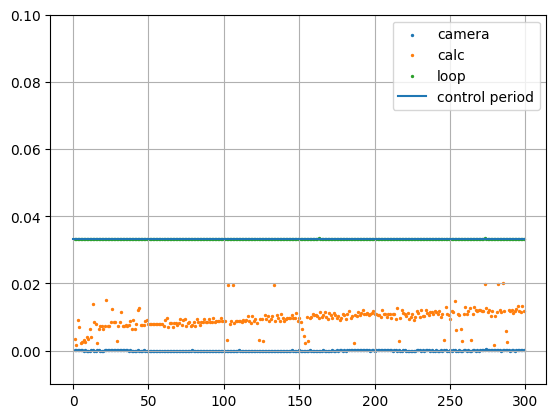

In [39]:
ts = np.arange(len(camera_times))
plt.scatter(ts, camera_times, s=2)
plt.scatter(ts, calc_times, s=2)
plt.scatter(ts, loop_times, s=2)
plt.plot(np.array([period for _ in ts]))
plt.grid()
# plt.ylim([-.1,None])
plt.ylim([-.01,.1])

plt.legend(["camera", "calc", "loop", "control period"])

plt.show()